In [ ]:
!wget "https://www.dropbox.com/sh/3st0m56ysutsr90/AAB-193KAr7qhFrwbwBENjPNa?dl=0"

--2021-01-24 14:40:58--  https://www.dropbox.com/sh/3st0m56ysutsr90/AAB-193KAr7qhFrwbwBENjPNa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/3st0m56ysutsr90/AAB-193KAr7qhFrwbwBENjPNa [following]
--2021-01-24 14:40:59--  https://www.dropbox.com/sh/raw/3st0m56ysutsr90/AAB-193KAr7qhFrwbwBENjPNa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc438ea6d618e2b58fe8bdae2d75.dl.dropboxusercontent.com/zip_download_get/ArCwrWl_TztXoVeD0rWpSlJ0PC1mjbTaa5Dk-sAn7Ifq8o0Wxdq7Vsin_MNOwxgfjDqWTr-deaveG1sGVm6sEmVtZ8dE9GNbJDpIFOF_b7687g [following]
--2021-01-24 14:40:59--  https://uc438ea6d618e2b58fe8bdae2d75.dl.dropboxusercontent.com/zip_download_get/ArCwrWl_TztXoVeD0rWpSlJ0PC1mjbTaa5Dk-sAn7Ifq8o0Wxdq7Vsin_MNOwxgfjDqWTr-deaveG1sGV

In [ ]:
!unzip AAB-193KAr7qhFrwbwBENjPNa?dl=0 -d images/

Archive:  AAB-193KAr7qhFrwbwBENjPNa?dl=0
mapname:  conversion of  failed
   creating: images/cats/
   creating: images/dogs/
   creating: images/humans/
   creating: images/horses/
 extracting: images/dogs/dog.3.jpg   
 extracting: images/cats/cat.3.jpg   
 extracting: images/dogs/dog.9.jpg   
 extracting: images/cats/cat.6.jpg   
 extracting: images/dogs/dog.4.jpg   
 extracting: images/cats/cat.8.jpg   
 extracting: images/dogs/dog.5.jpg   
 extracting: images/cats/cat.7.jpg   
 extracting: images/dogs/dog.2.jpg   
 extracting: images/dogs/dog.8.jpg   
 extracting: images/cats/cat.5.jpg   
 extracting: images/dogs/dog.7.jpg   
 extracting: images/cats/cat.2.jpg   
 extracting: images/dogs/dog.1.jpg   
 extracting: images/cats/cat.4.jpg   
 extracting: images/cats/cat.1.jpg   
 extracting: images/dogs/dog.6.jpg   
 extracting: images/cats/cat.9.jpg   
 extracting: images/dogs/dog.57.jpg  
 extracting: images/cats/cat.15.jpg  
 extracting: images/dogs/dog.76.jpg  
 extracting: images/c

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from keras.preprocessing import image

In [60]:
DATA_DIR = "./images/"

In [61]:
map = {'cat' : 0, 'dog': 1, 'horse':2, 'human' :3 }
map_rev = {v:k for k,v in map.items()}
X = []
y = []

In [62]:
for folder in os.listdir(DATA_DIR):
  
  folder_path = DATA_DIR + folder
  all_imgs = os.listdir(folder_path)
  
  
  for img in all_imgs:
    
    img_path = folder_path +"/"+img
    # print(img_path)
    one_image = image.load_img(img_path,target_size=(50,50))
    one_image = image.img_to_array(one_image)/255.
    
    X.append(one_image)
    y.append( map[folder[0:-1]] )
    

In [63]:
len(X)

808

In [64]:
len(y)

808

In [65]:
X = np.array(X)
y = np.array(y)

In [66]:
X.shape

(808, 50, 50, 3)

In [67]:
y.shape

(808,)

In [68]:
from sklearn.utils import shuffle
# np.random.shuffle

In [69]:
X, y = shuffle(X, y)

In [70]:
X.shape

(808, 50, 50, 3)

In [71]:
y[:10]

array([1, 3, 0, 0, 2, 0, 3, 3, 1, 0])

In [92]:
def drawImg(img, title=None):
  plt.imshow(img.reshape(50,50,3))
  plt.axis('off')
  if title is not None:
    plt.title(map_rev[title])
  plt.show()

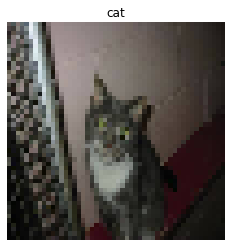

In [93]:
drawImg(X[13], y[13])

In [94]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)

In [102]:
X_train.shape, y_train.shape

((646, 50, 50, 3), (646,))

# CNN Model

In [143]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import to_categorical

In [146]:
model = Sequential()
model.add( Conv2D(filters=32,kernel_size=(3,3), strides=(1,1), activation='relu', input_shape= (50,50,3)) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

model.add( Conv2D(filters=64,kernel_size=(3,3),activation='relu' ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )

# model.add( Conv2D(filters=128,kernel_size=(3,3),activation='relu' ) )
model.add( MaxPool2D(pool_size=(2,2), strides=(2,2)) )


model.add( Flatten() )
model.add( Dense(units = 100, activation='relu') )
model.add( Dropout(0.3) )
model.add( Dense(units = 4, activation='softmax' ) )

In [147]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)              

In [148]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['acc'])

In [110]:
# DONOT RUN THIS CELL
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [149]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [150]:
checkpoint = ModelCheckpoint("./best_model.h5", monitor='val_loss', verbose = 1, save_best_only=True)
earlystop =  EarlyStopping(monitor='val_loss', min_delta=0.05, patience=5, verbose =1, restore_best_weights=True)

In [151]:
his = model.fit(x = X_train, y= y_train, batch_size=32, epochs=50, callbacks=[checkpoint, earlystop], validation_data=(X_test, y_test))

Epoch 1/50
21/21 [==============================] - 1s 13ms/step - loss: 1.4045 - acc: 0.2532 - val_loss: 1.3485 - val_acc: 0.4321

Epoch 00001: val_loss improved from inf to 1.34847, saving model to ./best_model.h5
Epoch 2/50
21/21 [==============================] - 0s 7ms/step - loss: 1.3404 - acc: 0.3575 - val_loss: 1.3076 - val_acc: 0.3827

Epoch 00002: val_loss improved from 1.34847 to 1.30755, saving model to ./best_model.h5
Epoch 3/50
21/21 [==============================] - 0s 7ms/step - loss: 1.2751 - acc: 0.4660 - val_loss: 1.1692 - val_acc: 0.4938

Epoch 00003: val_loss improved from 1.30755 to 1.16924, saving model to ./best_model.h5
Epoch 4/50
21/21 [==============================] - 0s 7ms/step - loss: 1.1641 - acc: 0.4850 - val_loss: 1.1211 - val_acc: 0.5123

Epoch 00004: val_loss improved from 1.16924 to 1.12106, saving model to ./best_model.h5
Epoch 5/50
21/21 [==============================] - 0s 7ms/step - loss: 1.1182 - acc: 0.4915 - val_loss: 1.0312 - val_acc: 0.55

In [152]:
history = his.history

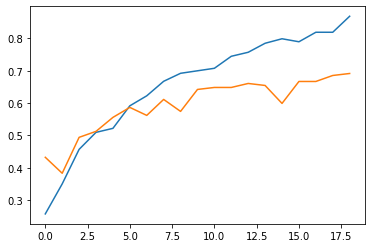

In [154]:
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.show()

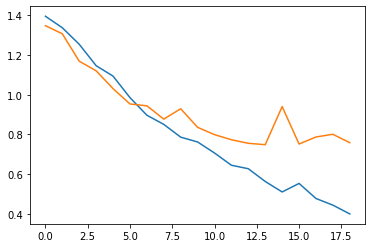

In [155]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.show()

In [156]:
model.evaluate(X_train, y_train)

21/21 [==============================] - 0s 3ms/step - loss: 0.4429 - acc: 0.8653


[0.442900151014328, 0.8653250932693481]

In [157]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.7485 - acc: 0.6543


[0.7485451698303223, 0.654321014881134]

# Prediction for External Images

In [161]:
import requests

In [162]:
res = requests.get("https://www.gulftoday.ae/-/media/images/horse-website.ashx?h=450&w=616&hash=E4E191B5267EFB67FCC6781CBCFC2590")

In [163]:
with open("horse.jpg", 'wb') as f:
  f.write(res.content)

In [167]:
img  = image.load_img('./horse.jpg', target_size=(50,50))
img = image.img_to_array(img)/255.
img = img.reshape(1,50,50,3)

In [168]:
img.shape

(1, 50, 50, 3)

In [173]:
y_pred = np.argmax(model.predict(img))
map_rev[y_pred]

'horse'